## 1. Einleitung
Am Ende Schreiben!
### 1.1 Vorstellung Datensatz
Dieser Datensatz enthält Informationen über verschiedene Attribute einer Reihe von Äpfeln, die Aufschluss über deren Eigenschaften geben. Der Datensatz <br>
enthält Details wie Frucht-ID, Größe, Gewicht, Süße, Knackigkeit, Saftigkeit, Reifegrad, Säuregehalt und Qualität.<sup>1</sup><br> <br>
    `1. A_id: Unique identifier for each fruit` <br>
    `2. Size: Size of the fruit`<br>
    `3. Weight: Weight of the fruit`<br>
    `4. Sweetness: Degree of sweetness of the fruit`<br>
    `5. Crunchiness: Texture indicating the crunchiness of the fruit`<br>
    `6. Juiciness: Level of juiciness of the fruit`<br>
    `7. Ripeness: Stage of ripeness of the fruit`<br>
    `8. Acidity: Acidity level of the fruit`<br>
    `9. Quality: Overall quality of the fruit`<br>
### 1.2 Erklärung der Referenzwerte
Die Hintergrundrecherche zu dem Datensatz hat ergeben, dass sich die Daten auf einen Standard Apfel beziehen und somit keine Werte in einer SI Einheit darstellen. Nach dem Bundeszentrum für Ernährung<br>
muss ein Apfel in Europa eine Mindestgröße von 60 Milimeter im Durchmesser aufweisen und ein Mindestgewicht von 90 Gramm haben.<sup>2</sup> Somit wird bei einem Wert von über Null von einem über <br>
dem Standard liegenden Apfel ausgegangen und bei einem Wert unter Null somit von einem Apfel unter den Standard Maßen. Da die Daten aus den Vereinigten Staaten von Amerika stammen werden im folgenden <br>
die Standard Apfelmaße der USA aufegführt.<br>
Der Apfelstandard der USA ist wie folgt (Beispielhaft):<sup>3</sup> <br><br>
<img src="../images/AppleStandard.png"><br>
<sub>Abbildung 1 Apfelstandard USA</sub><br><br>
<b>Quelle</b><br>
<sup>1</sup> https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data<br>
<sup>2</sup> https://www.bzfe.de/lebensmittel/vom-acker-bis-zum-teller/aepfel/aepfel-einkauf-und-kennzeichnung/#:~:text=Qualität%2C%20Form%20und%20Größe%20entscheiden,wenn%20sie%20ausreichend%20reif%20sind.<br>
<sup>3</sup> https://www.ams.usda.gov/sites/default/files/media/Apple_Standards.pdf<br>


In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

C:\Users\timon\AppData\Local\Temp\ipykernel_1260\3542823726.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the data
df = pd.read_csv('../data/apple_quality.csv', sep=',', header=0)
df = df.drop(columns=['A_id'])
# Split the data into X and y for the model
X = df.drop(columns=['Quality'])
y = df['Quality']

## 2. Vorbereitung der Daten
### 2.1 Daten Analyse
Die Charakterisierung der Daten erfolgt auf der Grundlage verschiedener statistischer und erläuternden Funktionen die auf den Datensatz angewendet werden. <br>
Die Charakterisierung dient dazu einen umfassenden Einblick in den Datensatzzu erhalten. Der "Overall Overview" ermöglicht einen ersten Überblick über die <br>
Daten. Ergänzt wird der "Overall Overview" durch die "Data Summary. Hier werden Informationen über die Dimension des Datensatzes gewonnen.Die "Data Info" <br>
gibt detaillierte Informationen über die Art der Daten in jeder Spalte, einschließlich der Anzahl der Nicht-Null-Einträge. Dies hilft, die Art der Daten <br>
zu verstehen und mögliche Probleme der Datenqualität, wie fehlende Werte zu identifizieren. Die "Data Description" liefert statistische Kennzahlen zu den <br>
numerischen Spalten des Datensatzes, wie zum Beispiel den Mittelwert, die Standardabweichung und Quartile. Dies hilft, ein besseres Verständnis für die <br>
Verteilung der Daten zu entwickeln. Zuletzt zeigt die Auswertung der "Missing Values" die Anzahl der fehlenden Werte in jeder Spalte des Datensatzes. Dies <br>
ist entscheidend, um potenzielle Datenqualitätsprobleme zu identifizieren und zu entscheiden, wie mit den fehlenden Werten umgegangen werden soll. Insgesamt <br>
bietet die Datenexploration einen fundierten Überblick über den vorliegenden Datensatz und dient als Grundlage zur weiteren Verarbeitung.

In [4]:
# Exploratory Data Analysis

# 1 Overall Overviwew
print('Head: \n',df.head())
# 2 Data Summary
print('\nSize: \n',df.shape)
# 3 Data Info
print('\nData Info: \n')
print(df.info())
# 4 Data Description
print('\nData Description: \n')
print(df.describe())
# 5 Missing Values
print('\nMissing Values: \n')
print(df.isnull().sum())

# Correlation Matrix
df_corr = df.drop(columns=['Quality'])
#correlation_matrix = df_corr.corr()
#print('\nCorrelation Matrix: \n')
#print(correlation_matrix)

# Quelle
# (5) https://www.kdnuggets.com/7-essential-data-quality-checks-with-pandas

Head: 
        Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

  Quality  
0    good  
1    good  
2     bad  
3    good  
4    good  

Size: 
 (4000, 8)

Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   R

### 2.2 Visualisierung der Daten
Die Visualisierung wird verwendet,  um die Beziehung zwischen verschiedenen attributiven Qualitäten von Äpfeln und deren Gesamtqualität zu untersuchen.<br><br>
Der Boxplot zeigt die Verteilung der apfelspezifischen Attribute (Größe, Gewicht, Süße, Knackigkeit, Saftigkeit, Reife, Säure) in Bezug auf die Qualität <br>
der Äpfel. Der Boxplot ermöglicht es, die Verteilung und die Ausreißer in den Attributen in Abhängigkeit von der Qualität zu visualisieren.<br><br>

Die Berechnung der Summe der "guten" und "schlechten" Werte sowie die anschließende Darstellung als Kreisdiagramm ermöglicht es, die prozentuale Verteilung<br> 
von guten und schlechten Äpfeln visuell darzustellen.<br><br> 

Die Erstellung einer Heatmap der Korrelationsmatrix gibt einen Überblick über die Korrelationen zwischen den verschiedenen apfelspezifischen Attributen. <br>
Die Heatmap zeigt, wie stark die Attribute untereinander korreliert sind und ermöglicht es, Muster und Zusammenhänge zu identifizieren.<br><br>

Schließlich visualisiert der Pairplot die Beziehung zwischen den verschiedenen attributiven Qualitäten der Äpfel durch Streudiagramme und Histogramme.<br> 
Durch die Farbcodierung nach Qualität können Unterschiede und Muster zwischen guten und schlechten Äpfeln identifiziert werden.<br><br>

Insgesamt ermöglichen diese wissenschaftlichen Schritte eine umfassende Analyse der apfelspezifischen Attribute in Bezug auf die Qualität und tragen dazu bei,<br> 
Muster, Zusammenhänge und Unterschiede zwischen guten und schlechten Äpfeln zu identifizieren.

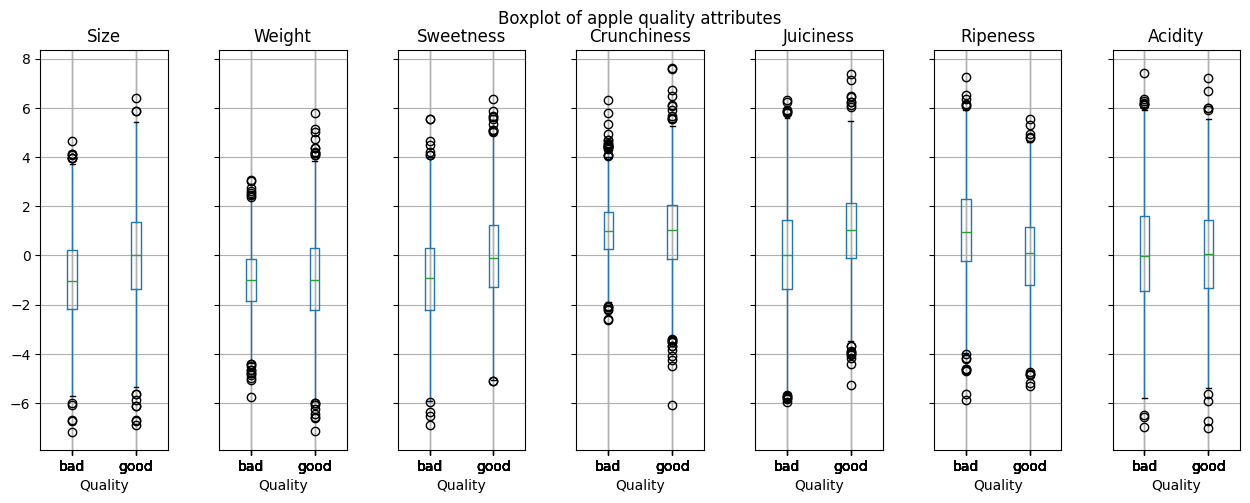

In [7]:
# Boxplot of apple quality attributes in relation to the quality
df.boxplot(column=['Size', 
                   'Weight', 
                   'Sweetness', 
                   'Crunchiness', 
                   'Juiciness', 
                   'Ripeness', 
                   'Acidity'], 
           by='Quality', 
           layout=(1, 7), 
           figsize=(15, 5))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

plt.suptitle('Boxplot of apple quality attributes')

plt.show()

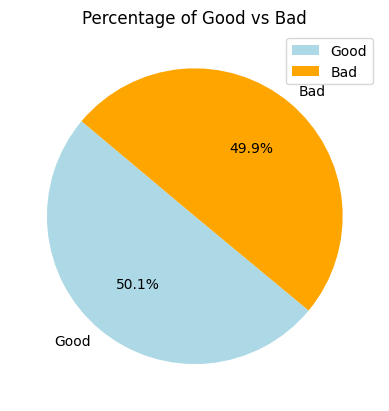

In [18]:
# Calculate the sum of "good" and "bad" values
good_count = df[df['Quality'] == 'good'].shape[0]
bad_count = df[df['Quality'] == 'bad'].shape[0]
total_count = good_count + bad_count

# Calculate percentages
good_percentage = good_count / total_count * 100
bad_percentage = bad_count / total_count * 100

# Create a pie chart
labels = ['Good', 'Bad']
sizes = [good_percentage, bad_percentage]
colors = ['lightblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title and legend
plt.title('Percentage of Good vs Bad')
plt.legend(labels, loc="best")

# Display the chart
plt.show()

<Axes: >

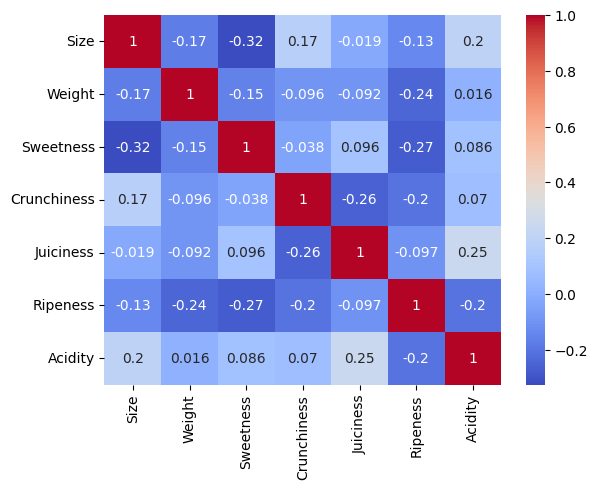

In [34]:
# Create a heatmap of the correlation matrix
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Pairplot of Apple Quality Attributes by Quality')

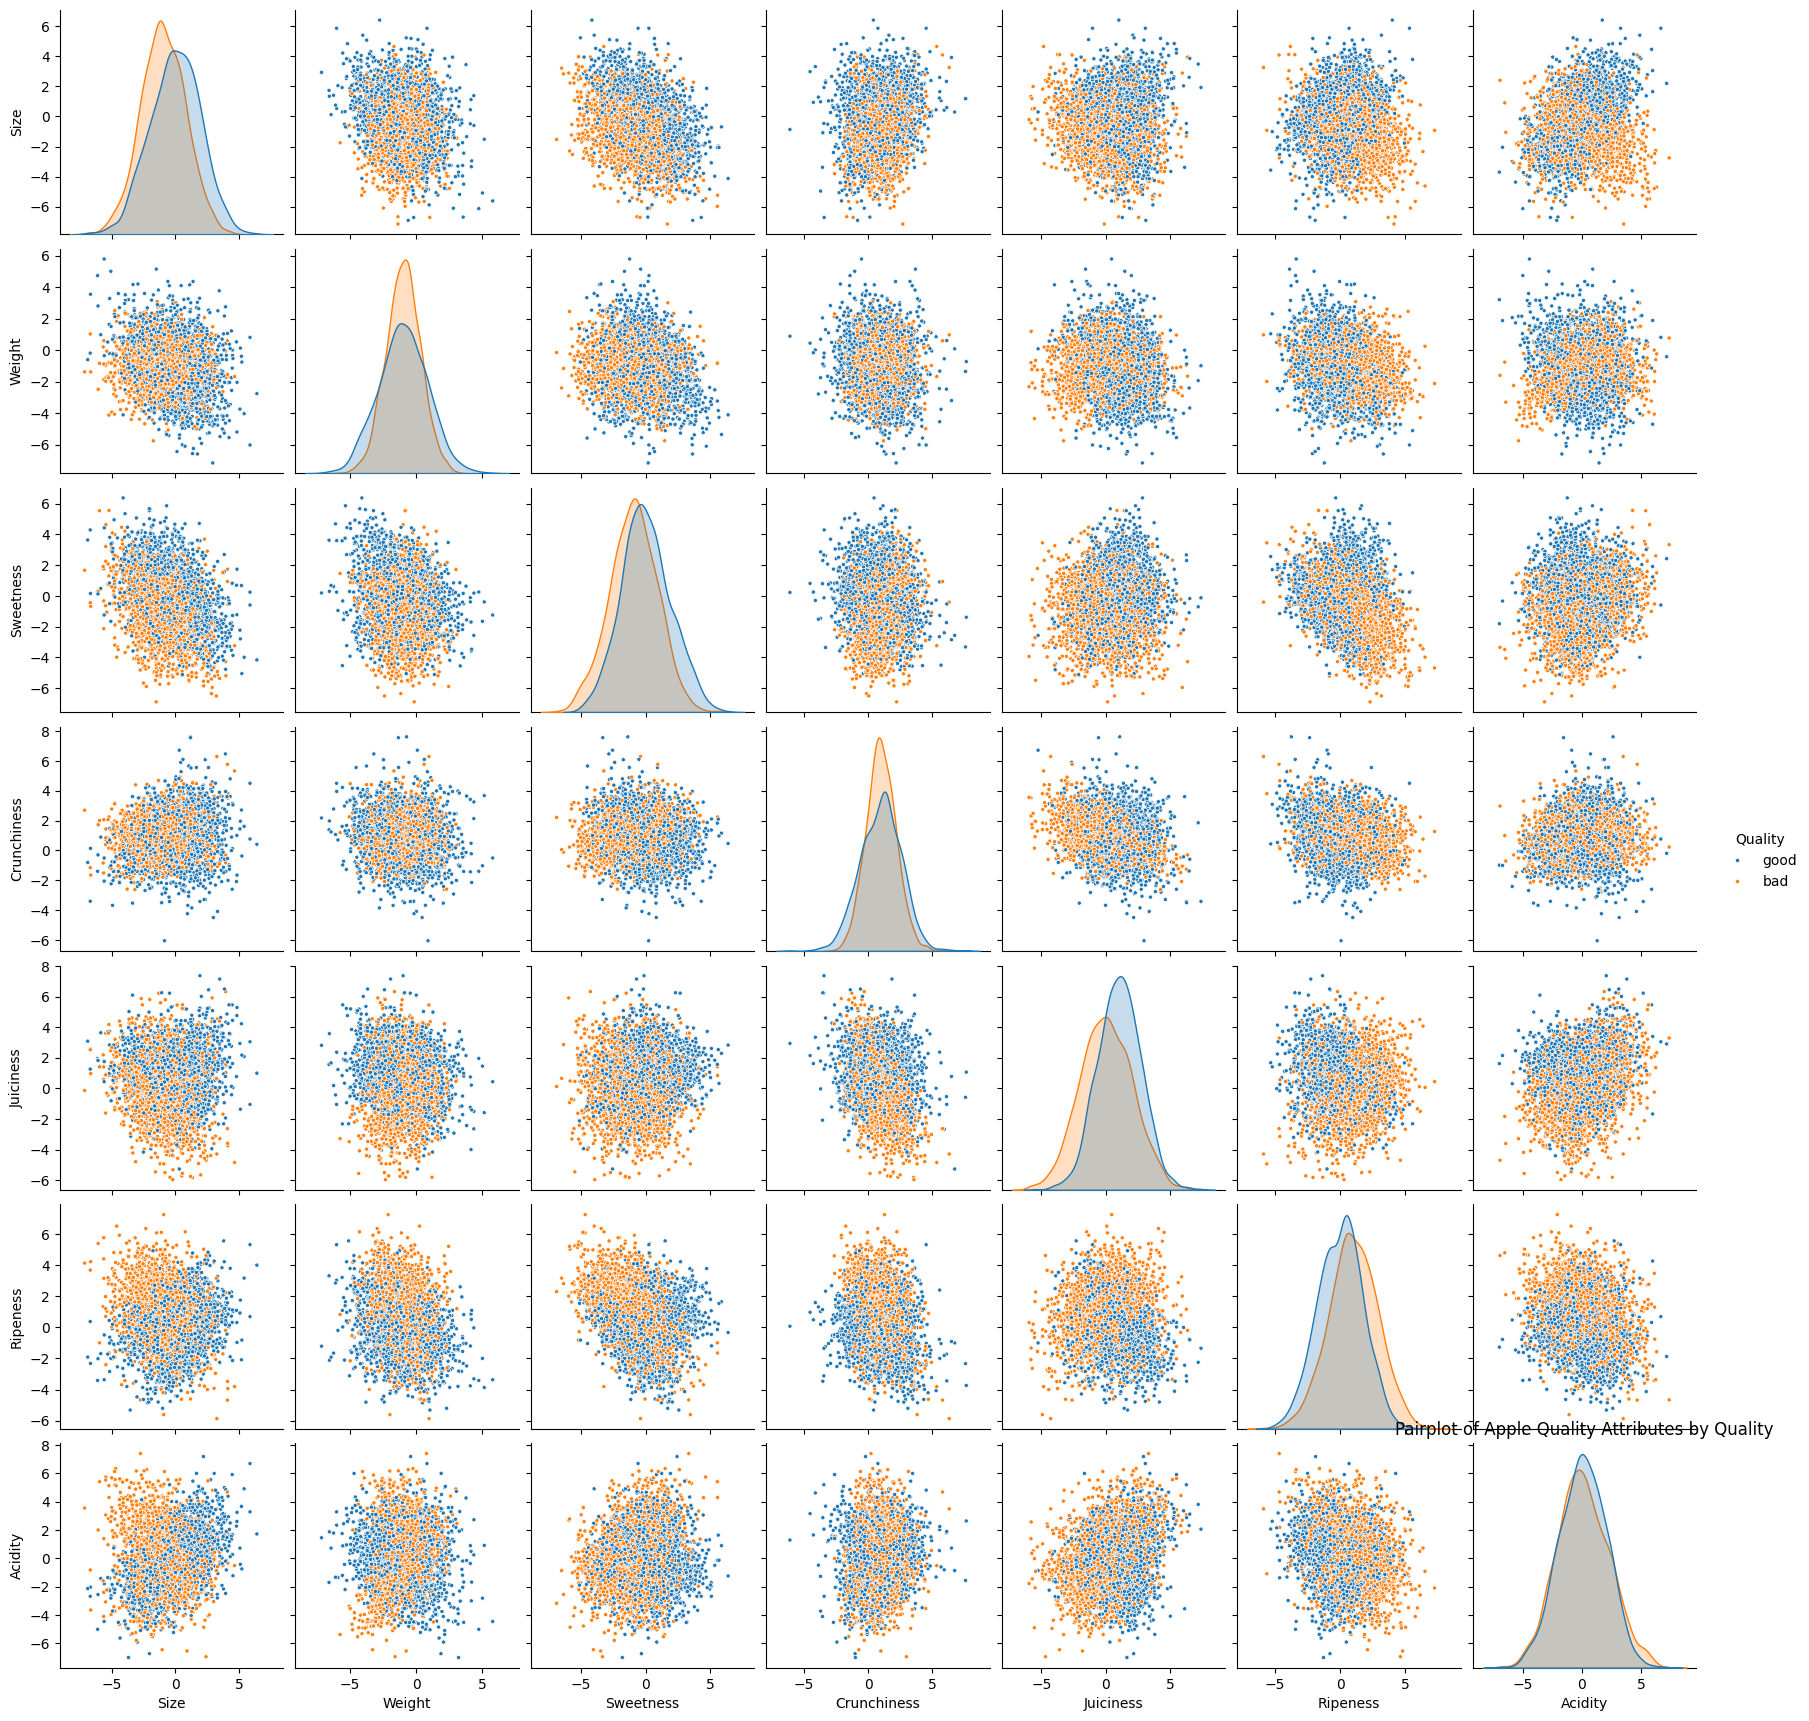

In [5]:
# Pairplot
sns.pairplot(df, hue='Quality', markers=[".", "."])
plt.title('Pairplot of Apple Quality Attributes by Quality')

### 2.3 Feature Engineering
Ein Decision Tree Classifier ist ein Werkzeug im Bereich des maschinellen Lernens, das zur Klassifizierung von Daten verwendet wird. Es basiert auf<br> 
dem Prinzip der rekursiven Partitionierung, bei der der Datensatz in immer kleinere Teilmengen aufgeteilt wird, um Entscheidungsregeln abzuleiten. <br>

Die Überprüfung der Wichtigkeit einzelner Werte mittels eines Decision Tree Classifiers ermöglicht es, die Beiträge der verschiedenen Merkmale zur<br> 
Klassifikation zu verstehen und diejenigen Merkmale zu identifizieren, die entscheidend für die Klassifikation sind. Dies wiederum kann dazu<br> 
beitragen, die Modellinterpretation zu verbessern, die Merkmalsauswahl zu optimieren und Einblicke in die zugrunde liegenden Daten zu gewinnen.<br>
Die Auswertung des Decision Tree Classifier ergibt, dass die 'Size' (22%), 'Ripeness' (20%), 'Juiciness' (19%) den größten Einfluss auf die Klassifiezierung der <br>
Äpfel haben. 

In [25]:
# Desicion Tree
cols = df.columns[0:7]

clf1 = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
clf1.fit(df[cols], df['Quality'])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
# make sklearn classification report
y_pred = clf1.predict(df[cols])
print(classification_report(df['Quality'], y_pred, target_names=df['Quality'].unique()))

              precision    recall  f1-score   support

        good       0.73      0.85      0.78      1996
         bad       0.82      0.68      0.74      2004

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.76      4000
weighted avg       0.77      0.77      0.76      4000



In [27]:
# print importance of features
for i in range(len(cols)):
    print("{}\t{:.2f}".format(cols[i], clf1.feature_importances_[i]))
    # print("{}\t{:.2f}".format(cols[1], clf1.feature_importances_[1]))

Size	0.22
Weight	0.11
Sweetness	0.13
Crunchiness	0.01
Juiciness	0.19
Ripeness	0.20
Acidity	0.13


### 2.4 Datensatz Split
Dieser Prozess wird als Datenpartitionierung bezeichnet und ist wichtig, um sicherzustellen, dass das Modell angemessen trainiert, <br>
validiert und getestet wird, ohne dass die Ergebnisse durch Overfitting oder Underfitting beeinflusst werden. Durch diese Aufteilung<br> 
des Datensatzes in Trainings-, Validierungs- und Testsets können Modelle zunächst auf den Trainingsdaten trainiert und dann auf den<br> 
Validierungsdaten optimiert werden. Anschließend kann die Leistung des Modells mit den Testdaten bewertet werden, um sicherzustellen, <br> 
dass es auf neuen, unabhängigen Daten gut generalisiert. <br><br>

`Entfernen der Spalten Sweetness, Crunchiness, Juiciness und Acidity. Aufgrund von einer Spezialisierung auf Noninvasive Testmethoden.`

In [17]:
# Split the data into training (2800), validation (840), and test (360) sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.3, random_state=0)

### 2.5 Auswahl der Metriken
Angesichts der Tatsache, dass ein Apfelhändler Gefahr läuft, seinen Ruf zu schädigen, wenn er überreife Äpfel an seine Kunden verkauft,<br> 
ist es entscheidend, dass das Klassifizierungsmodell in erster Linie den Recall optimiert. Der Recall misst den Anteil der tatsächlich <br>
positiven Fälle, die korrekt als solche identifiziert wurden. In diesem Szenario ist es wichtiger, sicherzustellen, dass überreife oder<br>
minderwertige Äpfel als solche erkannt und aussortiert werden, selbst wenn dies bedeutet, dass gelegentlich ein qualitativ hochwertiger<br>
Apfel fälschlicherweise aussortiert wird. Der wirtschaftliche Schaden, der durch den Verlust eines guten Apfels entsteht, wird als geringer <br>
angesehen als der Schaden, der entsteht, wenn minderwertige Äpfel an den Einzelhandel weitergegeben werden und so das Vertrauen der Kunden <br>
beeinträchtigen.<br><br>

Das Optimieren auf Recall bedeutet, dass das Modell so eingestellt wird, dass es möglichst wenige minderwertige Äpfel als qualitativ <br>
hochwertig klassifiziert. Dies kann durch die Anpassung der Entscheidungsgrenze des Modells erreicht werden, wodurch die Klassifizierungs-<br>
schwelle verschoben wird, um den Fokus auf die Identifizierung von minderwertigen Äpfeln zu legen, selbst wenn dadurch gelegentlich gute <br>
Äpfel fälschlicherweise aussortiert werden.<br><br>

Durch diese Schwerpunktsetzung auf den Recall wird sichergestellt, dass das Modell seine Fähigkeit verbessert, minderwertige Äpfel zuver-<br>
lässig zu erkennen, was letztendlich dazu beiträgt, den Ruf des Apfelhändlers zu schützen und den wirtschaftlichen Schaden zu minimieren.

## Machine Learning